# Logistic Regression as a Single Neuron Model

## Imports

In [25]:
import numpy as np
import h5py
import requests
import os
import matplotlib.pyplot as plt

## Helper Functions (Just run this cell - no need to go through the code in helper functions)

In [26]:
def download_file(url, local_filename):
    """
    Downloads a file from a URL and saves it locally.
    """
    if not os.path.exists(local_filename):
        print(f"Downloading {local_filename}...")
        response = requests.get(url)
        if response.status_code == 200:
            with open(local_filename, 'wb') as f:
                f.write(response.content)
            print(f"File downloaded: {local_filename}")
        else:
            raise Exception(f"Failed to download file from {url}. Status code: {response.status_code}")
    else:
        print(f"File already exists: {local_filename}")

def load_dataset():
    # URLs of the .h5 files
    train_url = 'https://github.com/PyDataGBC/PyML2025/raw/refs/heads/main/LabWeek2/dataset/train_catvnoncat.h5'
    test_url = 'https://github.com/PyDataGBC/PyML2025/raw/refs/heads/main/LabWeek2/dataset/test_catvnoncat.h5'

    # Local file paths
    train_file = 'train_catvnoncat.h5'
    test_file = 'test_catvnoncat.h5'

    # Download the files if not already present
    download_file(train_url, train_file)
    download_file(test_url, test_file)

    # Open the files using h5py
    train_dataset = h5py.File(train_file, "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])  # Train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])  # Train set labels

    test_dataset = h5py.File(test_file, "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])  # Test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])  # Test set labels

    classes = np.array(test_dataset["list_classes"][:])  # List of classes

    # Reshape labels
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

## Importing Dataset

In [27]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

File already exists: train_catvnoncat.h5
File already exists: test_catvnoncat.h5


## Data Visualization

label:  [1]


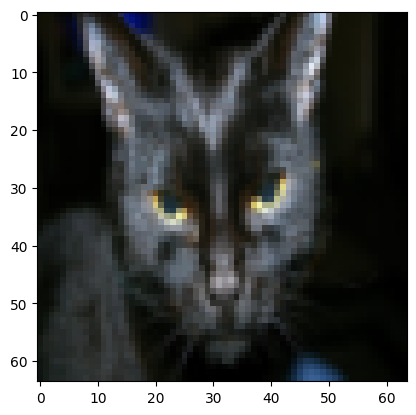

In [28]:
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])
print("label: ", train_set_y[:, index])

### **Exercise 1:** Take a look at five different images in train/test set. Try to see both cat and non-cat samples.

Training Set Images:


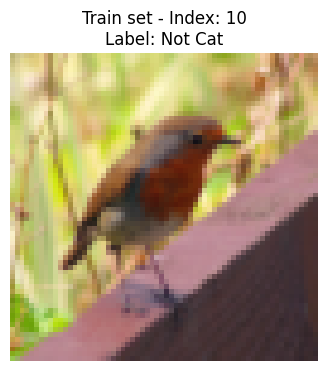

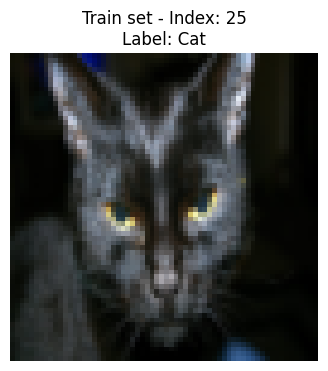

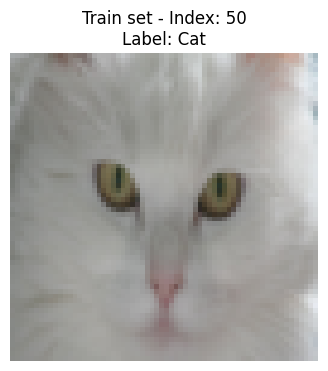


Test Set Images:


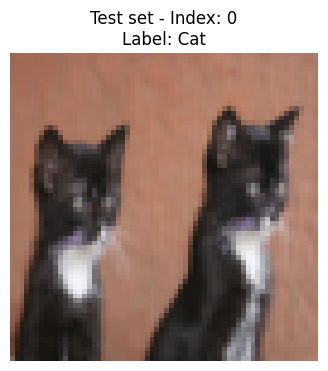

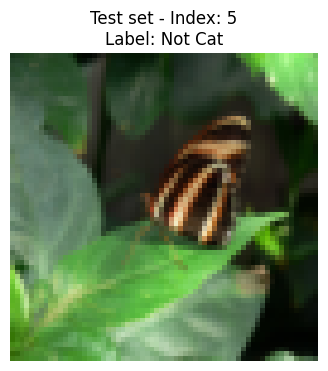

In [29]:
#your code here

def display_image(image, label, index, set_name):
    plt.figure(figsize=(4, 4))
    plt.imshow(image)
    plt.title(f"{set_name} set - Index: {index}\nLabel: {'Cat' if label == 1 else 'Not Cat'}")
    plt.axis('off')
    plt.show()

print("Training Set Images:")
for i in [10, 25, 50]:
    display_image(train_set_x_orig[i], train_set_y[0, i], i, "Train")


print("\nTest Set Images:")
for i in [0, 5]:
    display_image(test_set_x_orig[i], test_set_y[0, i], i, "Test")


### **Exercise 2:** What percentage of the pictures in `train set` contain cats?

In [30]:
# your code here

total_images = train_set_y.shape[1]

cat_images = np.sum(train_set_y)

percentage_cats = (cat_images / total_images) * 100

print(f"Total images in train set: {total_images}")
print(f"Number of cat images: {cat_images}")
print(f"Percentage of pictures containing cats: {percentage_cats:.2f}%")


Total images in train set: 209
Number of cat images: 72
Percentage of pictures containing cats: 34.45%


## Data Pre-processing

### Brief Theory: Numerical Representation of Images

![preprocessing](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek2/assets/imvectorkiank.png)

### Simple Numerical Example

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek2/assets/imtovec_example.webp)

#### Step 1: Numerical representation of each channel

In [31]:
red_channel = np.array([[255, 123, 135], [44, 12, 15], [56, 87, 90]]) # 2d array: Matrix
green_channel = np.array([[255, 133, 175], [24, 123, 169], [98, 66, 77]])
blue_channel = np.array([[66, 54, 88], [55, 98, 54], [87, 142, 89]])

print("Red Channel")
print(red_channel.shape)
print(red_channel)

print("Green Channel")
print(green_channel.shape)
print(green_channel)

print("Bue Channel")
print(blue_channel.shape)
print(blue_channel)



Red Channel
(3, 3)
[[255 123 135]
 [ 44  12  15]
 [ 56  87  90]]
Green Channel
(3, 3)
[[255 133 175]
 [ 24 123 169]
 [ 98  66  77]]
Bue Channel
(3, 3)
[[ 66  54  88]
 [ 55  98  54]
 [ 87 142  89]]


#### Step 2: Putting the channels together in the form of a tensor

In [32]:
print("channel, height, width")
airplane_image = np.array([red_channel, green_channel, blue_channel])  # 3d array: Tensor
print(airplane_image.shape)
print(airplane_image)

channel, height, width
(3, 3, 3)
[[[255 123 135]
  [ 44  12  15]
  [ 56  87  90]]

 [[255 133 175]
  [ 24 123 169]
  [ 98  66  77]]

 [[ 66  54  88]
  [ 55  98  54]
  [ 87 142  89]]]


#### Step 3: Flatten the tensor into a vector

In [33]:
airplane_flatten = airplane_image.flatten()   # 1d array: Vector
print(airplane_flatten.shape)
print(airplane_flatten)

(27,)
[255 123 135  44  12  15  56  87  90 255 133 175  24 123 169  98  66  77
  66  54  88  55  98  54  87 142  89]


### **Exercise 3:** Take one sample form train set again and check the shape of it. Try to interpret the numbers in the `shape`.

**Notes:**
- The images are 64x64 `pixels`.
- There are 3 RGB `channels`.

Shape of the sample image: (64, 64, 3)
Interpretation of the shape:
- Height: 64 pixels
- Width: 64 pixels
- Number of channels: 3


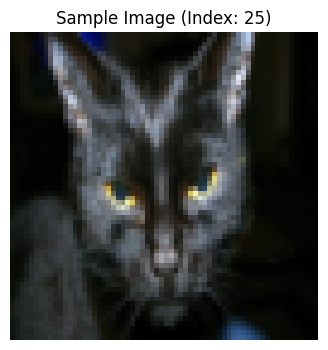

Label of the image: Cat


In [34]:
sample_index = 25
sample_image = train_set_x_orig[25]

#your code here

print(f"Shape of the sample image: {sample_image.shape}")
print(f"Interpretation of the shape:")
print(f"- Height: {sample_image.shape[0]} pixels")
print(f"- Width: {sample_image.shape[1]} pixels")
print(f"- Number of channels: {sample_image.shape[2]}")

plt.figure(figsize=(4, 4))
plt.imshow(sample_image)
plt.title(f"Sample Image (Index: {sample_index})")
plt.axis('off')
plt.show()

print(f"Label of the image: {'Cat' if train_set_y[0, sample_index] == 1 else 'Not Cat'}")

### Exercise 4: Fallaten the this sample image? what is the size of the flattened image? why this number?

In [35]:

flattened_image = sample_image.flatten()

flattened_size = flattened_image.shape[0]

print(f"Size of the flattened image: {flattened_size}")


Size of the flattened image: 12288


The size of the flattened image will be 12,288. This number is derived from the original dimensions of the image:
Height: 64 pixels
Width: 64 pixels
Channels: 3 (RGB)
The calculation is as follows:
64
×
64
×
3
=
12
,
288
64×64×3=12,288

### Data Preprocessing: Flattening the entrie Train and Test Datasets

In [36]:
train_flat = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1)
print(train_flat.shape)

test_flat = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1)
print(test_flat.shape)

train_label = train_set_y[0]
print(train_label.shape)

test_label = test_set_y[0]
print(test_label.shape)



(209, 12288)
(50, 12288)
(209,)
(50,)


**Important Notes:**
- We have 209 samples in the train set, and
- 50 samples in the test set.
- each sample has 64x64x3=12288 `features`. So each pixel can be considered as one feature.
- remember that we had `4` features in `IRIS` dataset and now we have more than `10,000` features.

## Implementing Logistic Regression



![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek2/assets/LogReg_kiank.png)

### **Exercise 5:** Train a `LogisticRegression` classifier to run a binary classification on the flattened cat pictures.

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [37]:
#your code here
from sklearn.metrics import classification_report

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(train_flat, train_label)

train_predictions = model.predict(train_flat)
test_predictions = model.predict(test_flat)

train_accuracy = accuracy_score(train_label, train_predictions)
test_accuracy = accuracy_score(test_label, test_predictions)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print("\nClassification Report (Test Set):")
print(classification_report(test_label, test_predictions, target_names=['Not Cat', 'Cat']))

Training Accuracy: 1.0
Test Accuracy: 0.66

Classification Report (Test Set):
              precision    recall  f1-score   support

     Not Cat       0.50      0.65      0.56        17
         Cat       0.79      0.67      0.72        33

    accuracy                           0.66        50
   macro avg       0.64      0.66      0.64        50
weighted avg       0.69      0.66      0.67        50



### **Exercise 6:** Evaluate your model manually

1. Choose a random index of an image.
2. Display the image.
3. Print the original label.
4. Print the predicted label.
5. Repeat this process multiple times to identify which pictures are more challenging for the model.

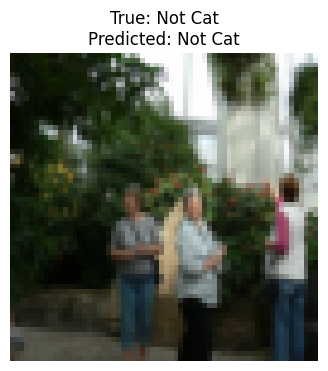

True label: Not Cat
Predicted label: Not Cat
Correct: True
-------------------


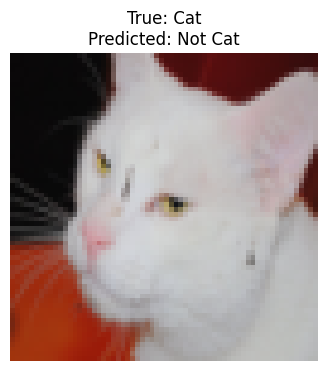

True label: Cat
Predicted label: Not Cat
Correct: False
-------------------


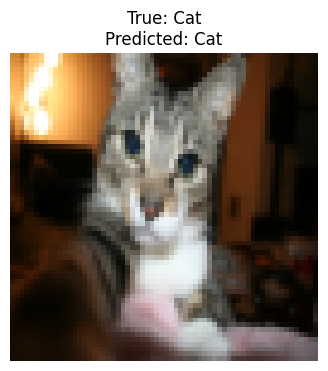

True label: Cat
Predicted label: Cat
Correct: True
-------------------


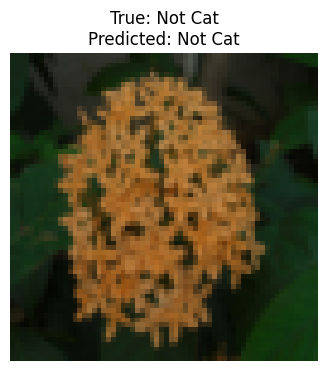

True label: Not Cat
Predicted label: Not Cat
Correct: True
-------------------


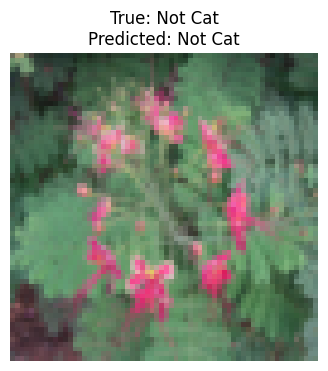

True label: Not Cat
Predicted label: Not Cat
Correct: True
-------------------


In [39]:
import numpy as np
import matplotlib.pyplot as plt

def evaluate_random_image(model, X, y, X_orig, class_names):

    idx = np.random.randint(0, X.shape[0])

    image = X_orig[idx]
    image_flat = X[idx].reshape(1, -1)

    true_label = y[idx]
    pred_label = model.predict(image_flat)[0]

    plt.figure(figsize=(4, 4))
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"True: {class_names[true_label]}\nPredicted: {class_names[pred_label]}")
    plt.show()

    print(f"True label: {class_names[true_label]}")
    print(f"Predicted label: {class_names[pred_label]}")
    print(f"Correct: {true_label == pred_label}")
    print("-------------------")

class_names = ['Not Cat', 'Cat']

for _ in range(5):
    evaluate_random_image(model, test_flat, test_label, test_set_x_orig, class_names)


### **Exercise 7:** Report the overall accuracy of your classifier.

In [40]:
#you code here

from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(test_label, test_predictions)

train_accuracy = accuracy_score(train_label, train_predictions)

print(f"Overall Test Accuracy: {test_accuracy:.4f}")
print(f"Overall Training Accuracy: {train_accuracy:.4f}")


Overall Test Accuracy: 0.6600
Overall Training Accuracy: 1.0000


## MNIST dataset (Optional)- Do exercise 8-10 if you have extra time to practise

In [41]:
#import mnist dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [42]:
x_train.shape

(60000, 28, 28)

Label:  1
Image Shape:  (28, 28)


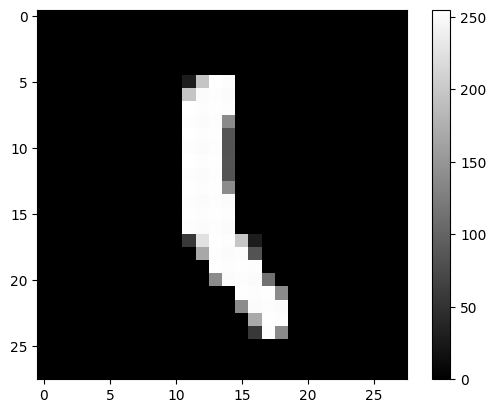

In [43]:
#Note: Run this cell multiple times
index = np.random.randint(0, x_train.shape[0])
print("Label: ", y_train[index])
print("Image Shape: ", x_train[index].shape)
plt.imshow(x_train[index], cmap='gray')
plt.colorbar()

### **Excercise 8:** What is the difference between a black-and-white image and a color image in terms of numerical representation?

### Hint: check the number of channels in the two types of images.



```
# This is formatted as code
```

your answer here: The main difference between a black-and-white (grayscale) image and a color image in terms of numerical representation lies in the number of channels used to represent each pixel:
Black-and-white (grayscale) images:
Use a single channel to represent each pixel
In the case of MNIST, each image has a shape of (28, 28, 1)
Pixel values typically range from 0 (black) to 255 (white) or 0.0 to 1.0 when normalized
Require less storage space compared to color images
Color images:
Use three channels to represent each pixel, typically Red, Green, and Blue (RGB)
Would have a shape of (height, width, 3)
Each channel has values ranging from 0 to 255 or 0.0 to 1.0 when normalized
Require more storage space than grayscale images

The MNIST dataset uses grayscale images, which is why each image has a shape of (28, 28, 1), indicating a single channel13. This representation is sufficient for handwritten digit recognition, as color information is not necessary for this task.
In contrast, a color image of the same dimensions would have a shape of (28, 28, 3), with each pixel represented by three values corresponding to the intensities of red, green, and blue23.


### **Exercise 9:** Select one data sample and flatten it. What is the size of the flattened image and why?

Original image shape: (28, 28)
Flattened image shape: (784,)
Size of the flattened image: 784


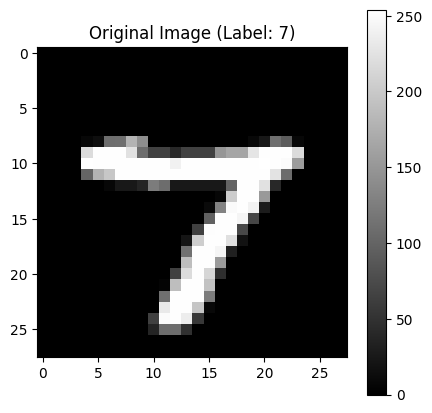

In [44]:
## your code here

index = np.random.randint(0, x_train.shape[0])
sample_image = x_train[index]

flattened_image = sample_image.flatten()

print(f"Original image shape: {sample_image.shape}")
print(f"Flattened image shape: {flattened_image.shape}")
print(f"Size of the flattened image: {flattened_image.size}")

plt.figure(figsize=(5,5))
plt.imshow(sample_image, cmap='gray')
plt.title(f"Original Image (Label: {y_train[index]})")
plt.colorbar()
plt.show()


### **Excercise 10:** Flatten the Entire Train and Test Datasets and implement a logistic regression model on MNIST dataset. What is the accuracy of your model?

In [47]:
##your code here

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train_flat = x_train.reshape(x_train.shape[0], -1)
X_test_flat = x_test.reshape(x_test.shape[0], -1)

model = LogisticRegression(random_state=42, max_iter=100)
model.fit(X_train_flat, y_train)

y_pred = model.predict(X_test_flat)
accuracy = accuracy_score(y_test, y_pred)

print(f"Logistic Regression accuracy on MNIST: {accuracy:.4f}")


Logistic Regression accuracy on MNIST: 0.9255


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Some food for thought:** What would the architecture of my model be if I used more than one neuron to predict the label?